In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
train = pd.read_csv('dataset/cinema_data_train.csv', index_col=0)
test = pd.read_csv('dataset/cinema_data_test.csv', index_col=0)

In [7]:
train.head()

,total_sales
date,
2018-03-14,0.064068
2018-03-15,0.242298
2018-03-16,0.255378
2018-03-17,0.058994
2018-03-18,0.078993


In [8]:
test.head()

,total_sales
date,
2018-08-15,0.289434
2018-08-16,0.607293
2018-08-17,0.731481
2018-08-18,0.243764
2018-08-19,0.132858


# Data Preprocessing

In [9]:
def create_dataset(orig_dataset, window_size=1): #windowing dataset
    data_x, data_y = [], []
    for i in range(len(orig_dataset) - window_size - 1):
        window = orig_dataset.iloc[i:(i + window_size), 0]
        target = orig_dataset.iloc[i + window_size, 0]
        data_x.append(window)
        data_y.append(target)
    return np.array(data_x), np.array(data_y)

In [10]:
window_size = 9
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

In [11]:
# reshaping X_train
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [12]:
# reshaping X_test
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Modeling with Simple RNN

In [18]:
# construct model
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(1,window_size), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# model compiling
simple_model.compile(
    loss='mse',
    optimizer='adam',
)

# model training
simple_model.fit(X_train,
                 y_train,
                epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 8ms/step - loss: 0.1810
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0743
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0544
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0570
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0469
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0404
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0400
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0377
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0353
Epoch 10/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 13/50
5/5 [==============================] - 0s 5ms/step - loss: 0.

In [21]:
y_pred_m1 = simple_model.predict(X_test)

print('R^2 Score in the test set is', r2_score(y_pred_m1, y_test))
print('MSE Score in the test set is', mean_squared_error(y_pred_m1, y_test))

2/2 [==============================] - 0s 8ms/step
R^2 Score in the test set is 0.48123928725692877
MSE Score in the test set is 0.01970043630533343


# Modeling with LSTM

In [22]:
# construct model
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(1,window_size), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

#  model compiling
model_lstm.compile(
    loss='mse',
    optimizer='adam',
)

# model fitting
model_lstm.fit(X_train,
          y_train,
          epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 9ms/step - loss: 0.1733
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1278
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0753
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0590
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0657
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0535
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0532
Epoch 8/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0515
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0476
Epoch 10/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0463
Epoch 11/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0428
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0406
Epoch 13/50
5/5 [==============================] - 0s 8ms/step - loss: 

In [23]:
y_pred_mlstm = model_lstm.predict(X_test)

print('R^2 Score of the test set is:', r2_score(y_pred_mlstm, y_test))
print('MSE Score of the test set is:', mean_squared_error(y_pred_mlstm, y_test))

2/2 [==============================] - 0s 6ms/step
R^2 Score of the test set is: 0.523452681423246
MSE Score of the test set is: 0.02000451751449235


## Some Notes

* Simple RNN model has MSE score in the train set: 0.016, in the test set: 0.019 
* LSTM model has MSE score in the train set: 0.015, in the test set: 0.020
        
These models are still bad considering the R^2 score for both model is still weak (0.48 for simple RNN, and 0.52 for LSTM). We will optimized it later

# Visualizing Forecast Result

In [24]:
# Load the full dataset
total_df = pd.read_csv("dataset/cinema_data.csv", index_col=0)

# Split data into train and test sets using 2:1 ratio
train_size = int(len(total_df) * 0.67)
train_df = total_df.iloc[0:train_size, :]
test_df = total_df.iloc[train_size:len(total_df), :]

# Instantiate scaler object and fit to the training set
scaler = MinMaxScaler()
scaler.fit(train_df)

# Scale train and test datasets based on the train dataset
# It's critical that we scale the test set using the same scaler object
train = pd.DataFrame(scaler.transform(train_df), columns=['total_sales'], index=train_df.index)
test = pd.DataFrame(scaler.transform(test_df), columns=['total_sales'], index=test_df.index)

2/2 [==============================] - 0s 0s/step


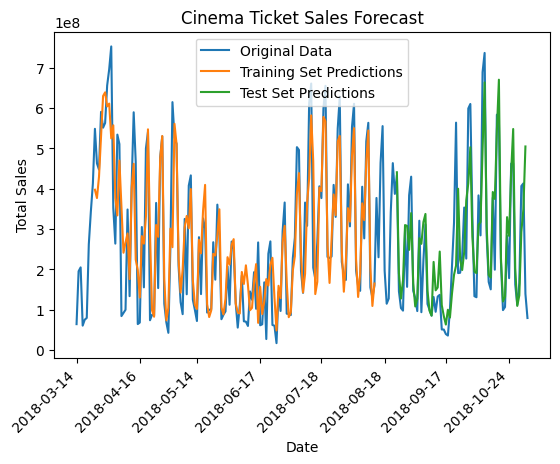

In [26]:
# Make predictions on train and test data
train_pred = simple_model.predict(X_train)
test_pred = simple_model.predict(X_test)

# Un-scale the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Load in the original data (for comparison)
baseline = pd.read_csv("dataset/cinema_data.csv", index_col=0)

# Un-window the training predictions
plot_train_pred = np.empty((len(baseline), 1))
plot_train_pred[:] = np.nan
plot_train_pred[window_size:len(train_pred) + window_size, :] = train_pred

# Un-window the test predictions
plot_test_pred = np.empty((len(baseline), 1))
plot_test_pred[:] = np.nan
plot_test_pred[len(train_pred) + (window_size * 2) + 1:len(baseline) - 1, :] = test_pred

# Plot the original data
plt.plot(baseline, label="Original Data")

# Plot the predictions
plt.plot(plot_train_pred, label="Training Set Predictions")
plt.plot(plot_test_pred, label="Test Set Predictions")

# Add title, axis labels, and a legend
plt.title('Cinema Ticket Sales Forecast')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.legend()